In [ ]:
# ! pip install wordcloud

In [2]:
import pandas as pd
from konlpy.tag import Hannanum
from konlpy.tag import Kkma
from konlpy.tag import Komoran
from konlpy.tag import Mecab
from konlpy.tag import Twitter
import wordcloud
# from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import nltk  # NLTK(Natural Language Toolkit) 
nltk.download('stopwords')
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JuhnnyKo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import platform
# sns.set()

from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
    print("It's unknown system. Hangul fonts are not supported!")
    
plt.rcParams["figure.figsize"] = [12,6]

%matplotlib notebook

## 크롤링 데이터 불러오기

In [4]:
df_petition = pd.read_csv('data/petition_crawling_equal_dev.csv', sep = ',', encoding='UTF-8')
df_petition.head()

,index,제목,청원시작,청원인원,Link
0,0,건전한 게임문화를 확립을 위하여 게임운영사의 게임내 게임 데이터판매응 처벌하여 주세요,2018-10-31,3,https://www1.president.go.kr/petitions/426949
1,1,서민경제 살리고 출산율도 높이는 필수 요소 2가지.,2018-10-31,4,https://www1.president.go.kr/petitions/426738
2,2,서민경제 살리고 출산율도 높이는 필수 요소 2가지.,2018-10-29,9,https://www1.president.go.kr/petitions/423705
3,3,5인 미만 회사는 직원을 마음대로 해고해도 되나요?,2018-10-29,7,https://www1.president.go.kr/petitions/423323
4,4,개인회생 소급적용 인천 의정부 수원은 왜 적용안되나요,2018-10-28,22,https://www1.president.go.kr/petitions/423175


In [5]:
df_hankr = pd.read_csv('data/hankr_work2.csv', sep = ',', encoding='UTF-8')
df_hankr.head()

,Unnamed: 0,날짜,제목,주소,청원인,본문
0,0,2018-10-31,현대차노조및민주노총해체,https://www1.president.go.kr/petitions/427387,42,광주형일자리 반대하는 현대차노조 및 민주노총해체하라 민주노총 및 현대차 금속노조는...
1,1,2018-10-31,"광주형 일자리 사업을 통해, 청년 일자리를 만들어 주세요.",https://www1.president.go.kr/petitions/427339,11,"광주형 일자리 사업 또 '흔들'…현대차 노조 ""협약 체결땐 총파업 -- 라는 기사에..."
2,2,2018-10-31,시중 유동자금을 주식시장으로 유도하는 정책이 필요한게 아닌가요?,https://www1.president.go.kr/petitions/427328,10,너무 일자리 정책에만 골몰하지 말고 기업이 잘되면 해결되는 문제 아닌가요? 두루...
3,3,2018-10-31,"광주형 일자리 사업을 통해, 청년 일자리를 만들어 주세요.",https://www1.president.go.kr/petitions/427326,2,"광주형 일자리 사업 를 귀족 노조가 승인하면, 청년 백수 고용이 늘어 납니다. 제..."
4,4,2018-10-31,공공의료제로 바뀔때 됐습니다~,https://www1.president.go.kr/petitions/427319,2,한국은 의료순위가 OEDC 밖 인 58위 입니다~ 그런데 의사수는 매우적고 의사봉...


In [120]:
df_chosun = pd.read_csv('data/cho_birth_final.csv', sep = ',', encoding='EUC-kR')
df_chosun.head()

,Unnamed: 0,Unnamed: 0.1,Title,Date
0,0,0,"왜 분만실 아내들은 남편에게 '저리가' 화를 내지? 의문이 풀렸다, 남편 손보다 ...",2018. 10. 25
1,1,1,우리·IBK기업은행서 아이 명의 통장 만들면 1만원 들어와요,2018. 10. 25
2,2,2,"""어린이집 공급률 10%p 늘어나면 둘째·셋째 낳겠다는 부모도 는다""(1.39%p)",2018. 10. 22
3,3,3,"한국 출산연령, 세계 평균보다 4.4세 많다",2018. 10. 18
4,4,4,예산 느는데 아이들은 확 줄어… 돈 주체 못하는 시·도교육청,2018. 10. 18


In [34]:
df_petition['청원시작'] = pd.to_datetime(df_petition['청원시작'])
df_petition.head()

,index,제목,청원시작,청원인원,Link
0,0,건전한 게임문화를 확립을 위하여 게임운영사의 게임내 게임 데이터판매응 처벌하여 주세요,2018-10-31,3,https://www1.president.go.kr/petitions/426949
1,1,서민경제 살리고 출산율도 높이는 필수 요소 2가지.,2018-10-31,4,https://www1.president.go.kr/petitions/426738
2,2,서민경제 살리고 출산율도 높이는 필수 요소 2가지.,2018-10-29,9,https://www1.president.go.kr/petitions/423705
3,3,5인 미만 회사는 직원을 마음대로 해고해도 되나요?,2018-10-29,7,https://www1.president.go.kr/petitions/423323
4,4,개인회생 소급적용 인천 의정부 수원은 왜 적용안되나요,2018-10-28,22,https://www1.president.go.kr/petitions/423175


In [35]:
df_chosun['Date'] = pd.to_datetime(df_chosun['Date'])
df_chosun.head()

,Unnamed: 0,Unnamed: 0.1,Title,Date
0,0,0,"왜 분만실 아내들은 남편에게 '저리가' 화를 내지? 의문이 풀렸다, 남편 손보다 ...",2018-10-25
1,1,1,우리·IBK기업은행서 아이 명의 통장 만들면 1만원 들어와요,2018-10-25
2,2,2,"""어린이집 공급률 10%p 늘어나면 둘째·셋째 낳겠다는 부모도 는다""(1.39%p)",2018-10-22
3,3,3,"한국 출산연령, 세계 평균보다 4.4세 많다",2018-10-18
4,4,4,예산 느는데 아이들은 확 줄어… 돈 주체 못하는 시·도교육청,2018-10-18


## 검색결과 개수 비교

In [68]:
count_petition = df_petition['청원시작'].groupby(df_petition['청원시작']).count()
count_hankr = df_hankr['날짜'].groupby(df_hankr['날짜']).count()
count_chosun = df_chosun['Date'].groupby(df_chosun['Date']).count()

In [76]:
rng = pd.date_range('1/1/2018', periods=304, freq='D')
df_count = pd.DataFrame({'국민청원': count_petition,
                        '조선일보': count_chosun,
                        '한겨레': count_hankr}, index= rng,)
df_count.fillna(0, inplace=True)
df_count.head()

,국민청원,조선일보,한겨레
2018-01-01,2.0,3.0,17
2018-01-02,0.0,0.0,21
2018-01-03,0.0,5.0,24
2018-01-04,3.0,0.0,22
2018-01-05,2.0,4.0,24


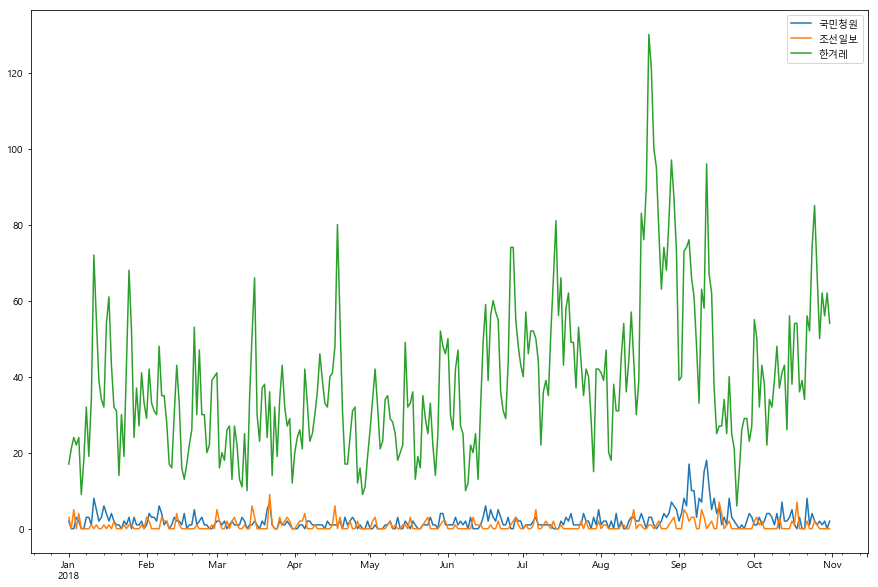

In [166]:
df_count.plot(figsize = (15,10))
plt.show()

In [85]:
hannanum = Hannanum()
# kkma = Kkma()
# komoran = Komoran()
# # mecab = Mecab()
# twitter = Twitter()

In [86]:
len(df_petition), len(df_chosun), len(df_hankr)

(645, 265, 11890)

In [87]:
add_tokens1 = []
count = 0

for text in df_petition['제목']:
    text = text.replace('\ud83c', '').replace('\xa0', '').replace('\u200b', '').replace('\u2013', '').replace('\u119e', '').replace('\u11a2', '').replace('\u200b', '')
    tokens = hannanum.nouns(text)
    add_tokens1 = add_tokens1 + tokens
    
    count += 1
    if count % 20 == 0:
        print(count)
        
print('Finished!')
#     equal_dev = nltk.Text(tokens, name = '균형발전 관련 청원 본문')
#     freq = equal_dev.vocab()


20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
Finished!


In [119]:
len(add_tokens1), add_tokens1[:10]

(3164,
 ['건전', '게임문화', '확립', '게임운영사의', '게임내', '게임', '데이터판매응', '처벌', '주세요', '서민경제'])

In [89]:
one_words = []
tow_words = []
etc_words = []
for noun in add_tokens1:
    if len(noun) == 1:
        one_words.append(noun)
    elif len(noun) == 2:
        tow_words.append(noun)
    else:
        etc_words.append(noun)
        
len(one_words), len(tow_words), len(etc_words)

(285, 1559, 1605)

In [90]:
one_words = list(set(one_words))
tow_words = list(set(tow_words))
etc_words = list(set(etc_words))

len(one_words), len(tow_words), len(etc_words)

(102, 650, 1082)

In [91]:
stop_words = ['.', '(', ')', ',', "'", '%', '-', 'X', ').', '×','의','자','에','안','번',
                      '호','을','이','다','만','로','가', '를']
# stop_words = ['제', '월', '일','조','수','때','그','이','바','및','안']
stop_words.extend(one_words)
len(stop_words)

125

In [92]:
# stop_words 빼기
add_tokens1 = [word for word in add_tokens1 if word not in stop_words]
len(add_tokens1)

3164

In [118]:
equal_dev1 = nltk.Text(add_tokens1, name = '저출산 청원 제목')
equal_dev1.collocations(num=20, window_size=3)

◈문재인정부 근본적; 공공기관 지방이전; 지방이전 균형발전을이루워주; 중국식 공산주의; 경제시스템 기본질서; 과도한 세금폭탄;
좌편향적 좌경화; 개인사유재산권 중국식; 과도한 경제적; 세금폭탄 경제적; 국민들 과도한; 국민들 세금폭탄; 기본질서 국민들;
이전해 주세요; 출산율 2가지; 좌경화 대국민적; 좌편향적 대국민적; 세종시 이전해; 세종시 주세요; 강남북 균형발전


In [190]:
df_freq1 = pd.DataFrame.from_dict(data=freq1, orient='index', columns=['Count'])
df_freq1.head()

,Count
건전,1
게임문화,1
확립,1
게임운영사의,1
게임내,1


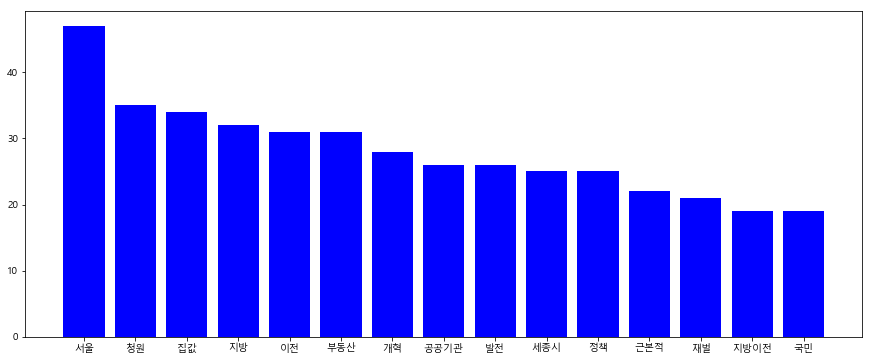

In [222]:
freq1 = equal_dev1.vocab()
# most_common() to DF
sorted_dict_keys = []
sorted_dict_values = []
for idx in freq1.most_common():
    sorted_dict_keys.append(idx[0])
    sorted_dict_values.append(idx[1])
    if len(sorted_dict_keys) == 15:
        break

plt.figure(figsize = (15, 6))

plt.bar(range(15), sorted_dict_values, color = 'b')
plt.xticks(range(15), sorted_dict_keys)
plt.show()

In [109]:
add_tokens2 = []
count = 0

for text in df_hankr['제목']:
    text = text.replace('\ud83c', '').replace('\xa0', '').replace('\u200b', '').replace('\u2013', '').replace('\u119e', '').replace('\u11a2', '').replace('\u200b', '')
    tokens = hannanum.nouns(text)
    add_tokens2 = add_tokens2 + tokens
    
    count += 1
    if count % 20 == 0:
        print(count)
        
print('Finished!')
#     equal_dev = nltk.Text(tokens, name = '균형발전 관련 청원 본문')
#     freq = equal_dev.vocab()


20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
980
1000
1020
1040
1060
1080
1100
1120
1140
1160
1180
1200
1220
1240
1260
1280
1300
1320
1340
1360
1380
1400
1420
1440
1460
1480
1500
1520
1540
1560
1580
1600
1620
1640
1660
1680
1700
1720
1740
1760
1780
1800
1820
1840
1860
1880
1900
1920
1940
1960
1980
2000
2020
2040
2060
2080
2100
2120
2140
2160
2180
2200
2220
2240
2260
2280
2300
2320
2340
2360
2380
2400
2420
2440
2460
2480
2500
2520
2540
2560
2580
2600
2620
2640
2660
2680
2700
2720
2740
2760
2780
2800
2820
2840
2860
2880
2900
2920
2940
2960
2980
3000
3020
3040
3060
3080
3100
3120
3140
3160
3180
3200
3220
3240
3260
3280
3300
3320
3340
3360
3380
3400
3420
3440
3460
3480
3500
3520
3540
3560
3580
3600
3620
3640
3660
3680
3700
3720
3740
3760
3780
3800
3820
3840
3860
3880
3900
3920
3940
3960
3980
4000
4020
4040
4060
4080
4100
4120
4140
4160
4180
4200
422

In [110]:
# stop_words 빼기
add_tokens2 = [word for word in add_tokens2 if word not in stop_words]
len(add_tokens2)

48649

In [117]:
equal_dev2 = nltk.Text(add_tokens2, name = '저출산 관련 한겨레 제목')
equal_dev2.collocations(num=20, window_size=3)

기초연금지급 대선공약; 일자리 안정자금; 정규직 정규직; ◈문재인정부 근본적; 파견직 직접고용; 가상화폐 거래소; 다산신도시
실버택배; 금감원 회계위반고시; 공영방송 파견직; 은행원 퇴직금; 불법난민 추방합; 공공부문 정규직; ☻문대통령 기초연금지급;
☻문대통령 대선공약; 공공기관 지방이전; 민간어린이집 가정어린이집; 불법난민 불법체류; 어린이집 유치원; 회계위반고시 주주들;
불법체류 추방합


In [157]:
freq2

FreqDist({'일자리': 1546, '청원': 410, '정부': 391, '정책': 346, '최저임금': 343, '국민': 310, '창출': 300, '문재': 272, '반대': 266, '공무원': 264, ...})

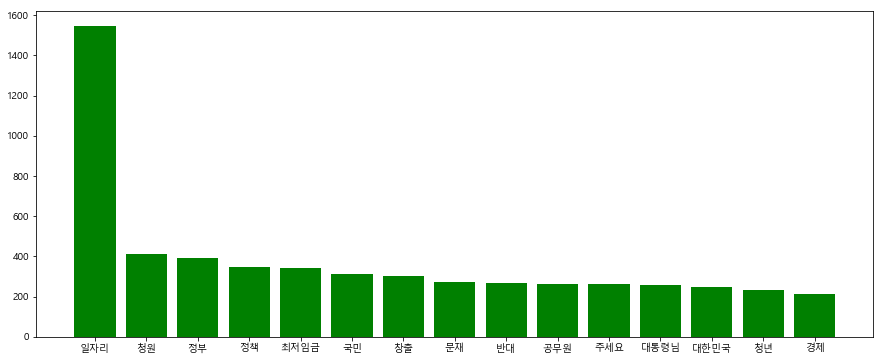

In [220]:
freq2 = equal_dev2.vocab()
# most_common() to DF
sorted_dict_keys = []
sorted_dict_values = []
for idx in freq2.most_common():
    sorted_dict_keys.append(idx[0])
    sorted_dict_values.append(idx[1])
    if len(sorted_dict_keys) == 15:
        break

plt.figure(figsize = (15, 6))

plt.bar(range(15), sorted_dict_values, color = 'g')
plt.xticks(range(15), sorted_dict_keys)
plt.show()

In [121]:
add_tokens3 = []
count = 0

for text in df_chosun['Title']:
    text = text.replace('\ud83c', '').replace('\xa0', '').replace('\u200b', '').replace('\u2013', '').replace('\u119e', '').replace('\u11a2', '').replace('\u200b', '')
    tokens = hannanum.nouns(text)
    add_tokens3 = add_tokens3 + tokens
    
    count += 1
    if count % 20 == 0:
        print(count)
        
print('Finished!')
#     equal_dev = nltk.Text(tokens, name = '균형발전 관련 청원 본문')
#     freq = equal_dev.vocab()


20
40
60
80
100
120
140
160
180
200
220
240
260
Finished!


In [130]:
# stop_words 빼기
add_tokens3 = [word for word in add_tokens3 if word not in stop_words]
len(add_tokens3), add_tokens3[:10]

(1433,
 ['분만실', '아내들', '남편', "'저리가'", '화', '의문', '남편', '손', '침대난간', '우리·IBK기업은행서'])

In [124]:
equal_dev3 = nltk.Text(add_tokens3, name = '저출산 관련 한겨레 제목')
equal_dev3.collocations(num=20, window_size=3)

알려주세요… 구매권; 알려주세요… 케이크·유아복; 케이크·유아복 구매권; 육아휴직자 건보료


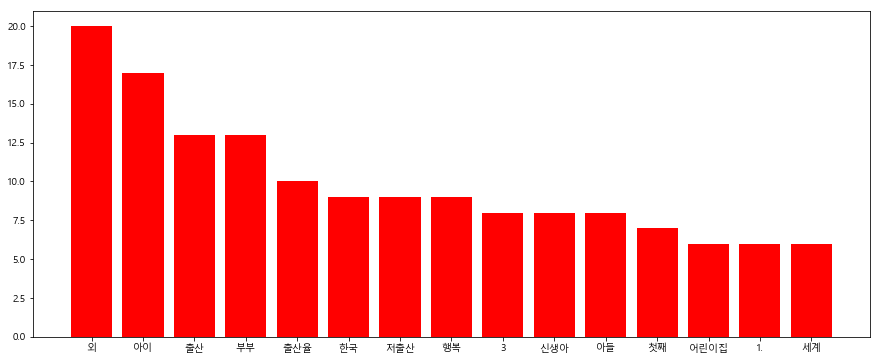

In [227]:
freq3 = equal_dev3.vocab()
# most_common() to DF
sorted_dict_keys = []
sorted_dict_values = []
for idx in freq3.most_common():
    sorted_dict_keys.append(idx[0])
    sorted_dict_values.append(idx[1])
    if len(sorted_dict_keys) == 15:
        break

plt.figure(figsize = (15, 6))

plt.bar(range(15), sorted_dict_values, color = 'r')
plt.xticks(range(15), sorted_dict_keys)

plt.show()

## 각 사이트별 특징 키워드 뽑아내기

In [139]:
# df_freq = pd.DataFrame({'국민청원':freq1.most_common()[:50],
#                         '한겨레': freq2.most_common()[:50],
#                         '조선일보': freq3.most_common()[:50]})
# df_freq.head()

,국민청원,한겨레,조선일보
0,"(서울, 47)","(일자리, 1546)","(외, 20)"
1,"(청원, 35)","(청원, 410)","(아이, 17)"
2,"(집값, 34)","(정부, 391)","(출산, 13)"
3,"(지방, 32)","(정책, 346)","(부부, 13)"
4,"(이전, 31)","(최저임금, 343)","(출산율, 10)"
